# ENTREGABLE 2

# INSTRUCCIONES

Realizar la segunda fase del análisis exploratorio usando el archivo CSV (`dataset_banco_clean.csv`) con 45189 filas y 17 columnas.

# Problema

Una entidad bancaria contrata a una empresa de marketing encargada de contactar telefónicamente a posibles clientes para determinar si están interesados o no en adquirir un certificado de depósito a término con el banco.

¿Qué perfil tienen los clientes con mayor potencial de conversión?

# El set de datos después de la limpieza

Cada registro contiene 16 características (las primeras 16 columnas) y una categoría ("yes" o "no" dependiendo de si la persona está o no interesada en adquirir el producto). Las columnas son:

1. "age":  edad (numérica)
2. "job": tipo de trabajo (categórica: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar","self-employed", "retired", "technician", "services")
3. "marital": estado civil (categórica: "married", "divorced", "single")
4. "education": nivel educativo (categórica: "unknown", "secondary", "primary", "tertiary")
5. "default": si dejó de pagar sus obligaciones (categórica: "yes", "no")
6. "balance": saldo promedio anual en euros (numérica)
7. "housing": ¿tiene o no crédito hipotecario? (categórica: "yes", "no")
8. "loan": ¿tiene créditos de consumo? (categórica: "yes", "no")
9. "contact": medio a través del cual fue contactado (categórica: "unknown", "telephone", "cellular")
10. "day": último día del mes en el que fue contactada (numérica)
11. "month": último mes en el que fue contactada (categórica: "jan", "feb", "mar", ..., "nov", "dec")
12. "duration": duración (en segundos) del último contacto (numérica)
13. "campaign": número total de veces que fue contactada durante la campaña (numérica)
14. "pdays": número de días transcurridos después de haber sido contactado antes de la campaña actual (numérica. -1 indica que no fue contactado previamente)
15. "previous": número de veces que ha sido contactada antes de esta campaña (numérica)
16. "poutcome": resultado de la campaña de marketing anterior (categórica: "unknown", "other", "failure", "success")
17. "y": categoría ¿el cliente se suscribió a un depósito a término? (categórica: "yes", "no")

# Análisis exploratorio

La idea es usar herramientas estadísticas y de visualización para:

- Crear un mapa mental del set de datos (entenderlo)
- Empezar a encontrar respuestas a la pregunta planteada inicialmente (¿qué perfil tienen los clientes con mayor potencial de conversión?)

Llevaremos a cabo estas fases:

1. Análisis de cada variable de manera individual
2. Análisis univariado: relación de cada variable predictora con la variable a predecir
3. Análisis bivariado: relación de pares de variables predictoras con la variable a predecir

Para cada una de ellas generar un pequeño resumen

In [1]:
# imports
import pandas as pd
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
ruta = '/content/drive/MyDrive/dataset_banco_clean.csv'
data = pd.read_csv(ruta)

In [4]:
print(data.shape)
data.head()

(45189, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


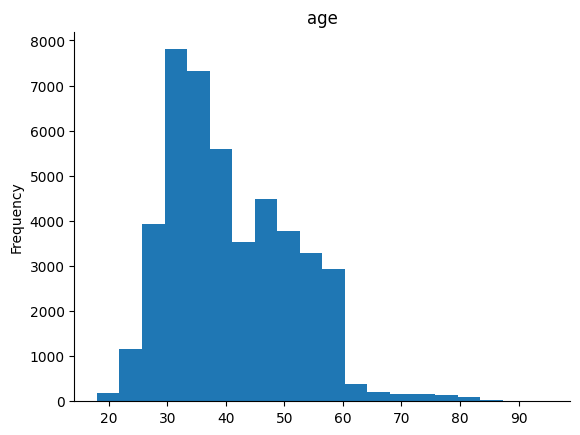

In [ ]:
# @title age

from matplotlib import pyplot as plt
data['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Calcular estadísticas descriptivas para la columna 'age'
estadisticas_age = data['age'].describe()

# Calcular la mediana para la columna 'age'
mediana_age = data['age'].median()

# Calcular la desviación estándar para la columna 'age'
desviacion_estandar_age = data['age'].std()

# Imprimir las estadísticas descriptivas
print("Estadísticas descriptivas para la columna 'age':")
print(estadisticas_age)
print("\nMediana de la columna 'age':", mediana_age)
print("Desviación estándar de la columna 'age':", desviacion_estandar_age)

Estadísticas descriptivas para la columna 'age':
count    45189.000000
mean        40.936445
std         10.618502
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

Mediana de la columna 'age': 39.0
Desviación estándar de la columna 'age': 10.618501656855587


Podemos observar que la media es aproximadamente 40.94 años, la edad mínima es de 18 años y la máxima de 95.

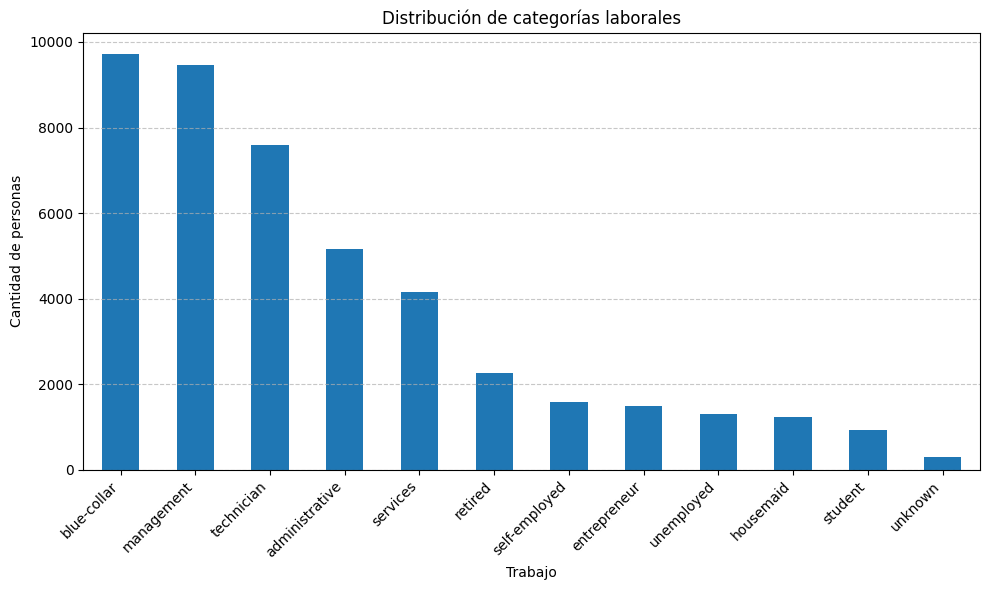

In [ ]:
# Obtener la cantidad de personas en cada categoría laboral
conteo_trabajos = data['job'].value_counts()

# Crear un gráfico de barras para visualizar la distribución de los trabajos
plt.figure(figsize=(10, 6))
conteo_trabajos.plot(kind='bar')
plt.title('Distribución de categorías laborales')
plt.xlabel('Trabajo')
plt.ylabel('Cantidad de personas')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# Calcular la frecuencia de cada estado civil
frecuencia_estado_civil = data['marital'].value_counts()

print("Frecuencia de cada estado civil:")
print(frecuencia_estado_civil)

Frecuencia de cada estado civil:
marital
married     27200
single      12785
divorced     5204
Name: count, dtype: int64


Los datos nos muestran que hay más personas casadas, que solteras o divorciadas.

In [ ]:
# Obtener la cantidad de personas en cada nivel educativo
conteo_educacion = data['education'].value_counts()

print("Cantidad de personas en cada nivel educativo:")
print(conteo_educacion)

Cantidad de personas en cada nivel educativo:
education
secondary    23187
tertiary     13298
primary       6847
unknown       1857
Name: count, dtype: int64


             balance           day      duration      campaign         pdays  \
count   45189.000000  45189.000000  45189.000000  45189.000000  45189.000000   
mean     1374.012149     15.807188    258.115006      2.763283     40.178893   
std      3924.370039      8.322549    257.349601      3.096579    100.107295   
min     -8019.000000      1.000000      1.000000      1.000000     -1.000000   
25%        72.000000      8.000000    103.000000      1.000000     -1.000000   
50%       448.000000     16.000000    180.000000      2.000000     -1.000000   
75%      1428.000000     21.000000    319.000000      3.000000     -1.000000   
max    527532.000000     31.000000   4918.000000     63.000000    871.000000   

           previous  
count  45189.000000  
mean       0.574166  
std        1.907950  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max       58.000000  


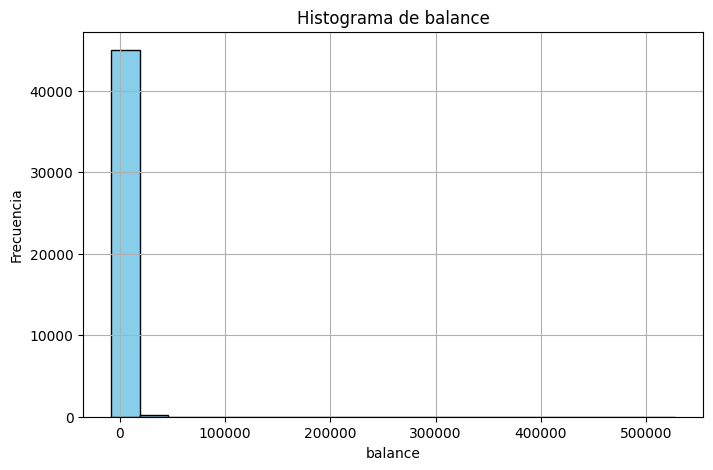

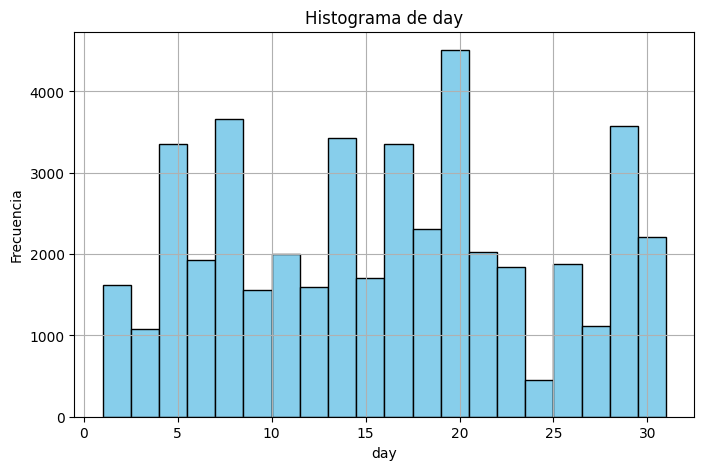

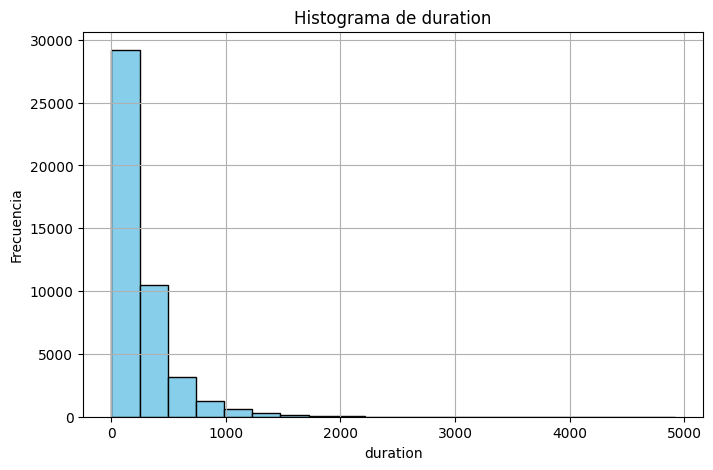

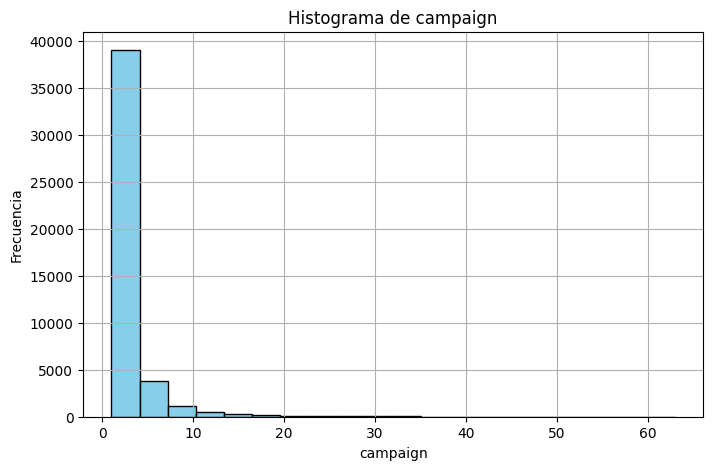

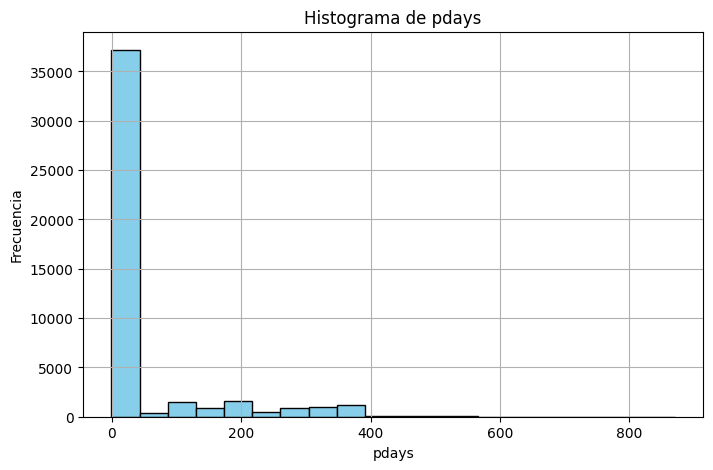

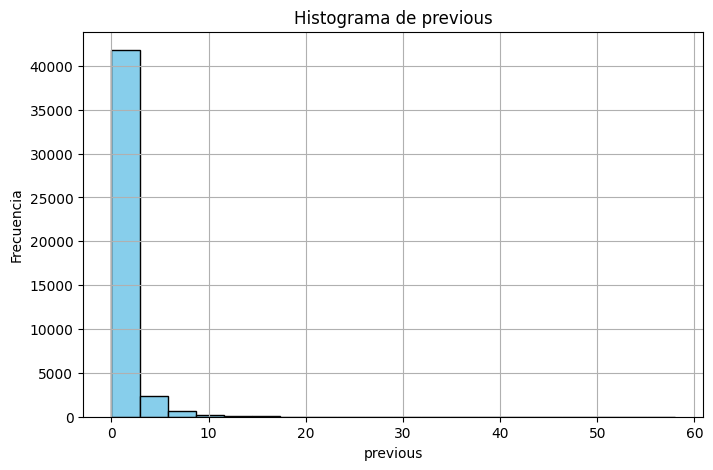

default
no     0.981965
yes    0.018035
Name: proportion, dtype: float64
housing
yes    0.555688
no     0.444312
Name: proportion, dtype: float64
loan
no     0.839762
yes    0.160238
Name: proportion, dtype: float64
contact
cellular     0.647813
unknown      0.287924
telephone    0.064263
Name: proportion, dtype: float64
month
may    0.304233
jul    0.152581
aug    0.138219
jun    0.118192
nov    0.087853
apr    0.064861
feb    0.058598
jan    0.031025
oct    0.016331
sep    0.012813
mar    0.010556
dec    0.004736
Name: proportion, dtype: float64
poutcome
unknown    0.817522
failure    0.108389
other      0.040651
success    0.033437
Name: proportion, dtype: float64


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Resumen estadístico para variables numéricas
numeric_vars = ["balance", "day", "duration", "campaign", "pdays", "previous"]

numeric_summary = data[numeric_vars].describe()
print(numeric_summary)

# Visualización de histogramas para variables numéricas
for var in numeric_vars:
    plt.figure(figsize=(8, 5))
    plt.hist(data[var], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histograma de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()

# Resumen estadístico para variables categóricas
categorical_vars = ["default", "housing", "loan", "contact", "month", "poutcome"]

for var in categorical_vars:
    categorical_summary = data[var].value_counts(normalize=True)
    print(categorical_summary)

Los datos nos muestran que para la variable balance:
La media del saldo promedio anual es de aproximadamente 1374.01 euros.
La desviación estándar es de aproximadamente 3924.37 euros, lo que indica una dispersión significativa en los saldos.
El saldo mínimo es de -8019 euros, lo que sugiere la presencia de saldos negativos.
El saldo máximo es de 527532 euros, lo que indica una gran variabilidad en los saldos entre los clientes.

Para las variables categóricas observamos en:

**default:**

Aproximadamente el 98.20% de los clientes no tienen incumplimientos en sus obligaciones financieras, mientras que solo el 1.80% sí tiene incumplimientos.

**housing:**

Alrededor del 55.57% de los clientes tienen crédito hipotecario, mientras que aproximadamente el 44.43% no lo tienen.

**loan:**

Cerca del 83.98% de los clientes no tienen créditos de consumo, mientras que alrededor del 16.02% sí tienen.

**contact:**

El 64.78% de los clientes fueron contactados a través de celular, el 28.79% a través de un medio desconocido y el 6.43% a través de teléfono fijo.

**month:**

La mayoría de los contactos se realizaron en mayo (30.42%), seguido por julio (15.26%) y agosto (13.82%). Las proporciones para otros meses son menores.

**poutcome:**

Para la mayoría de los casos anteriores, el resultado de la campaña de marketing anterior es desconocido (81.75%). Solo alrededor del 10.84% terminaron en fracaso, el 4.07% en otro resultado y el 3.34% en éxito.

Decido categorizar la variable edad y balance para tener el dataset más ordenado.

In [6]:
# Definir los rangos de edad para cada grupo
bins = [0, 35, 55, float('inf')]
labels = ['jóvenes', 'mediana edad', 'mayores']

# Crear una nueva columna 'grupo_edad' en tu DataFrame
data['grupo_edad'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)

# Mostrar la cantidad de personas en cada grupo de edad
print(data['grupo_edad'].value_counts())


grupo_edad
mediana edad    24478
jóvenes         15006
mayores          5705
Name: count, dtype: int64


In [7]:
# Definir los rangos de saldo para cada grupo
bins = [-float('inf'), 0, 1000, float('inf')]
labels = ['saldo insuficiente', 'saldo medio', 'saldo alto']

# Crear una nueva columna 'segmento_saldo' en tu DataFrame
data['segmento_saldo'] = pd.cut(data['balance'], bins=bins, labels=labels, right=False)

# Mostrar la cantidad de personas en cada segmento de saldo
print(data['segmento_saldo'].value_counts())


segmento_saldo
saldo medio           26789
saldo alto            14635
saldo insuficiente     3765
Name: count, dtype: int64


In [8]:
# Imprimir todas las columnas del DataFrame
print(data.columns)


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'grupo_edad', 'segmento_saldo'],
      dtype='object')


Como ya tengo mis variables edad y balance categorizadas en diferetes grupos, elimino esas columnas.


In [9]:
# Eliminar la variable 'age' del DataFrame
data.drop('age', axis=1, inplace=True)

# Verificar que la variable 'age' haya sido eliminada
print(data.head())

# Eliminar la columna 'balance' del DataFrame
data.drop('balance', axis=1, inplace=True)

# Verificar que la columna 'balance' haya sido eliminada
print(data.head())


            job  marital  education default  balance housing loan  contact  \
0    management  married   tertiary      no   2143.0     yes   no  unknown   
1    technician   single  secondary      no     29.0     yes   no  unknown   
2  entrepreneur  married  secondary      no      2.0     yes  yes  unknown   
3   blue-collar  married    unknown      no   1506.0     yes   no  unknown   
4       unknown   single    unknown      no      1.0      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome   y    grupo_edad  \
0    5   may     261.0         1   -1.0         0  unknown  no       mayores   
1    5   may     151.0         1   -1.0         0  unknown  no  mediana edad   
2    5   may      76.0         1   -1.0         0  unknown  no       jóvenes   
3    5   may      92.0         1   -1.0         0  unknown  no  mediana edad   
4    5   may     198.0         1   -1.0         0  unknown  no       jóvenes   

  segmento_saldo  
0     saldo alto  
1    saldo m

# Análisis univariado: relación de cada variable predictora con la variable a predecir

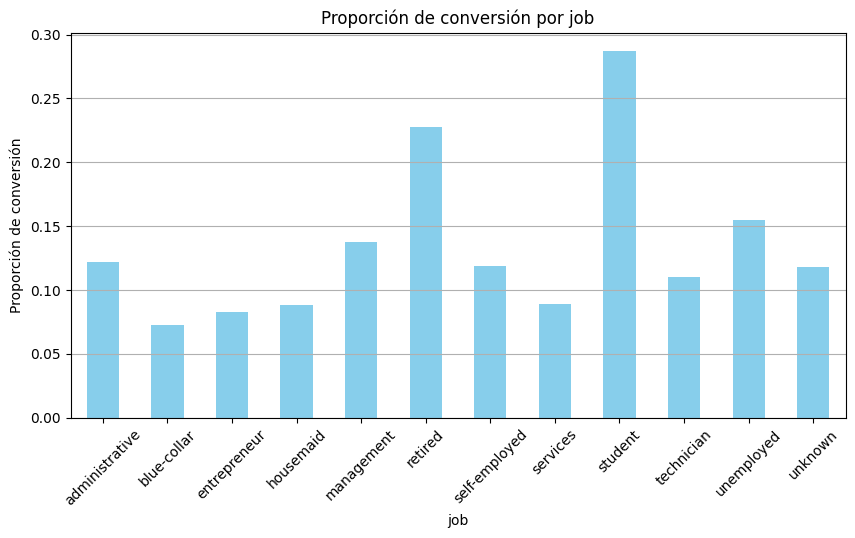

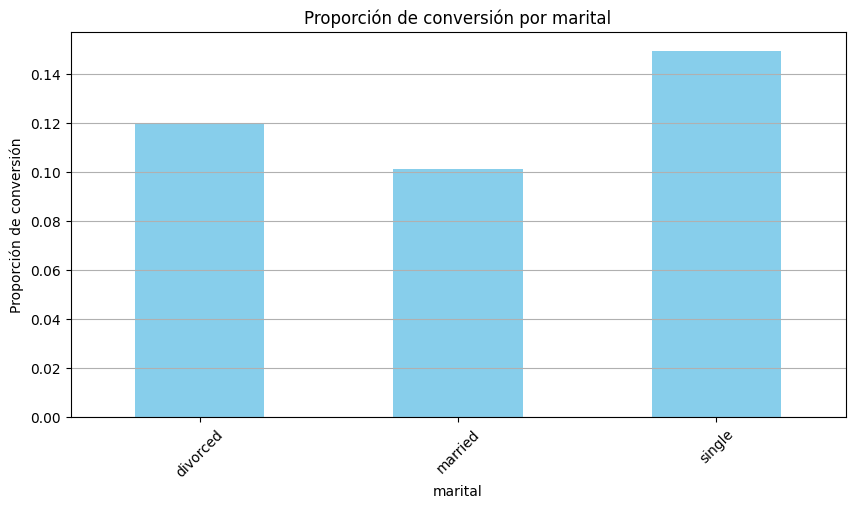

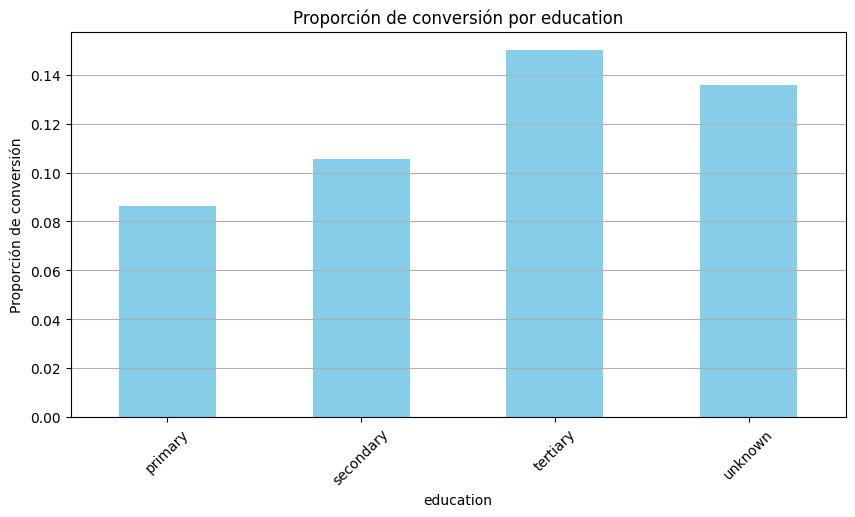

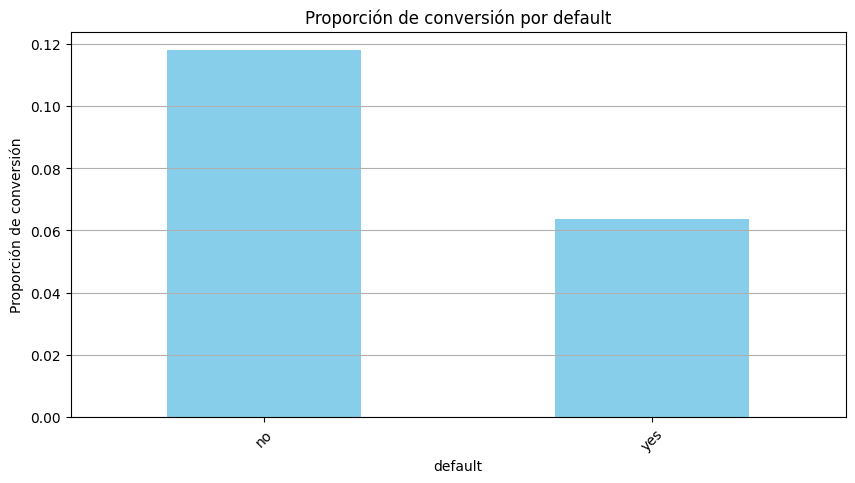

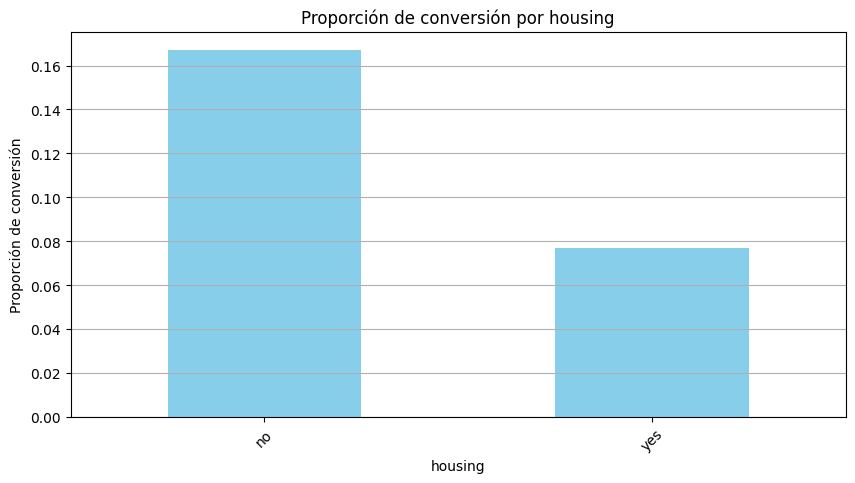

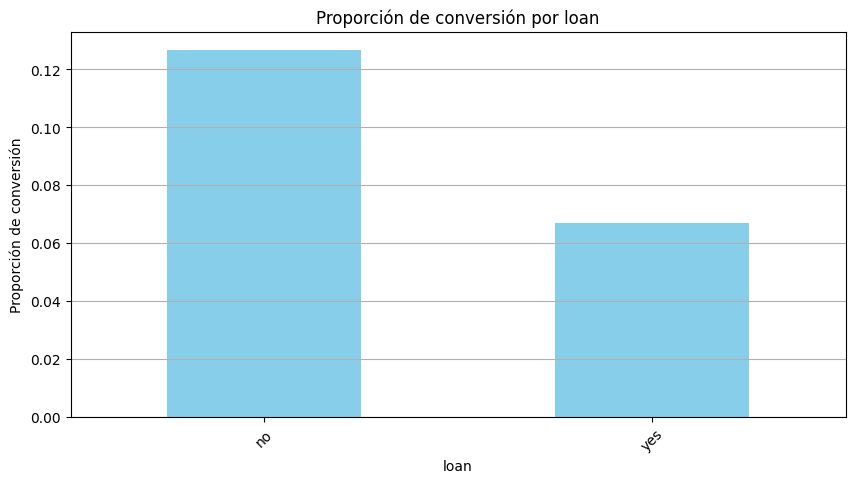

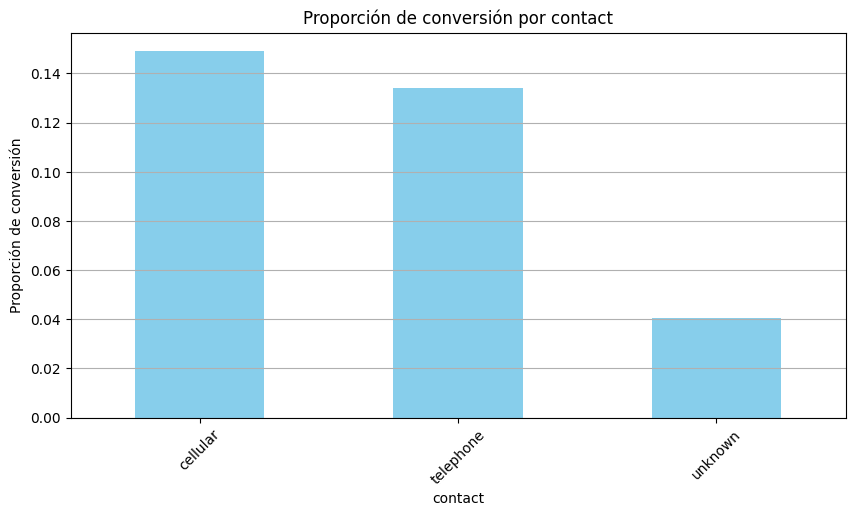

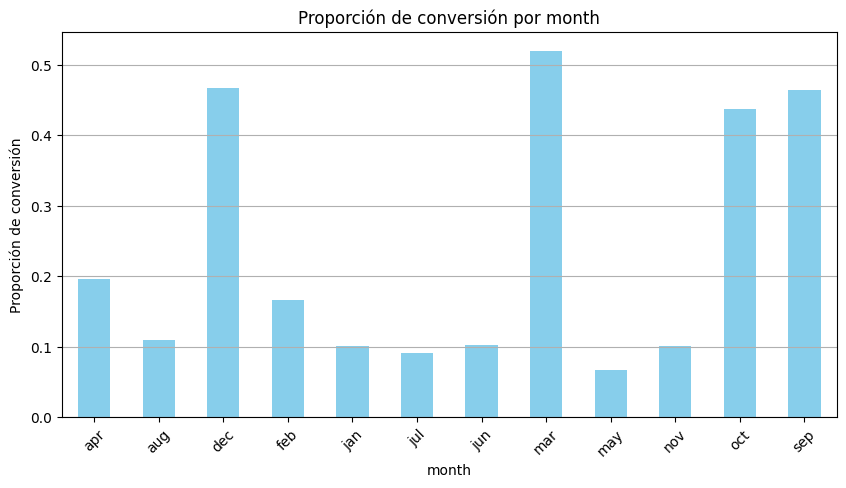

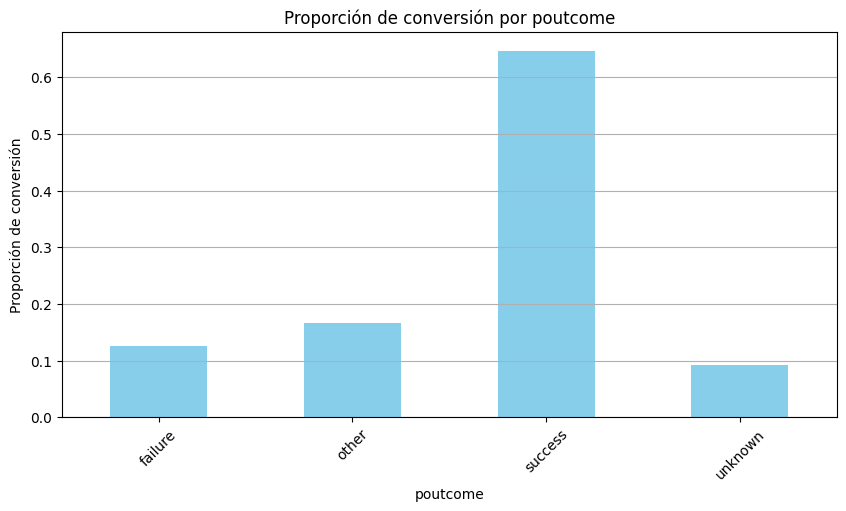

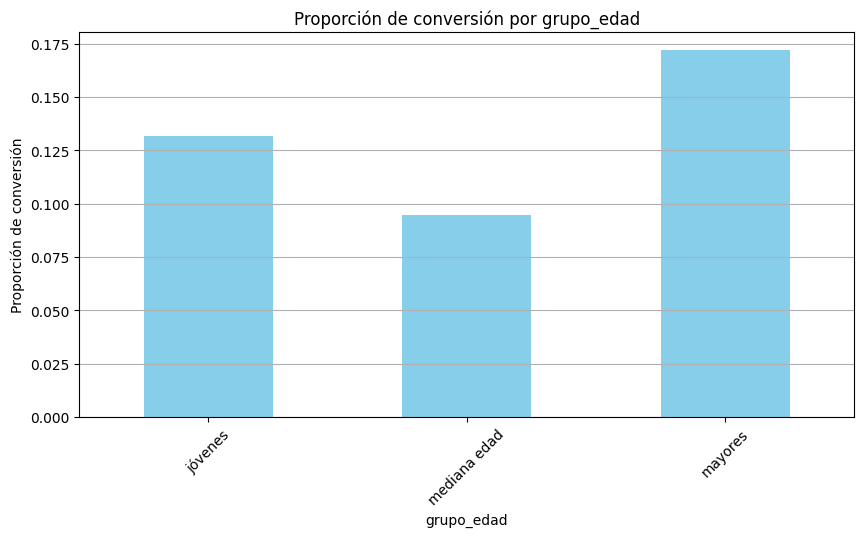

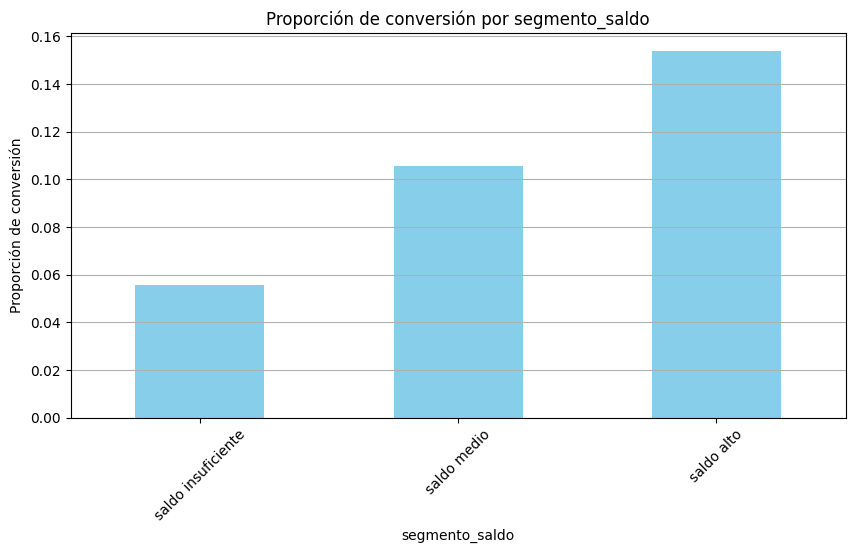

       count       mean       std  min  25%   50%   75%   max
y                                                            
no   39904.0  15.892943  8.294662  1.0  8.0  16.0  21.0  31.0
yes   5285.0  15.159697  8.503097  1.0  8.0  15.0  22.0  31.0
       count        mean         std  min    25%    50%    75%     max
y                                                                     
no   39904.0  221.207949  207.396917  1.0   95.0  164.0  279.0  4918.0
yes   5285.0  536.778997  391.919466  8.0  244.0  426.0  724.0  3881.0
       count      mean       std  min  25%  50%  75%   max
y                                                         
no   39904.0  2.845680  3.211144  1.0  1.0  2.0  3.0  63.0
yes   5285.0  2.141154  1.922254  1.0  1.0  2.0  3.0  32.0
       count       mean         std  min  25%  50%   75%    max
y                                                              
no   39904.0  36.409959   96.745141 -1.0 -1.0 -1.0  -1.0  871.0
yes   5285.0  68.635951  118.761070 -1.0

In [11]:
import matplotlib.pyplot as plt

# Análisis univariado de variables categóricas
categorical_vars = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome", "grupo_edad", "segmento_saldo"]

for var in categorical_vars:
    # Calcular la proporción de personas interesadas en adquirir el producto para cada categoría
    category_counts = data.groupby([var, 'y']).size().unstack()
    category_counts['conversion_rate'] = category_counts['yes'] / (category_counts['yes'] + category_counts['no'])

    # Visualizar la proporción de conversión para cada categoría en un gráfico de barras
    plt.figure(figsize=(10, 5))
    category_counts['conversion_rate'].plot(kind='bar', color='skyblue')
    plt.title(f'Proporción de conversión por {var}')
    plt.xlabel(var)
    plt.ylabel('Proporción de conversión')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

# Análisis univariado de variables numéricas
numeric_vars = ["day", "duration", "campaign", "pdays", "previous"]

for var in numeric_vars:
    # Calcular estadísticas descriptivas para cada grupo (interesados vs. no interesados)
    grouped_stats = data.groupby('y')[var].describe()
    print(grouped_stats)


Podemos destacar que en la variable count, el número total de observaciones en cada grupo, hay 39904 observaciones en el grupo "no" (no interesados) y 5285 observaciones en el grupo "yes" (interesados).

En el 25%, el percentil 25 de la variable para cada grupo. Esto significa que el 25% de los valores de la variable son iguales o menores que este valor. Por ejemplo, en el grupo "no", el 25% de las observaciones tienen una duración de llamada de 95 segundos o menos.

# Análisis bivariado: relación de pares de variables predictoras con la variable a predecir


Tabla de contingencia para job vs. y:
y                 no   yes
job                       
administrative  4537   631
blue-collar     9020   707
entrepreneur    1363   123
housemaid       1131   109
management      8155  1300
retired         1748   515
self-employed   1391   187
services        3783   369
student          668   269
technician      6753   839
unemployed      1101   202
unknown          254    34

P-valor de la prueba de chi-cuadrado para job vs. y: 4.9481029070625774e-172

Tabla de contingencia para marital vs. y:
y            no   yes
marital              
divorced   4582   622
married   24448  2752
single    10874  1911

P-valor de la prueba de chi-cuadrado para marital vs. y: 1.843820525618259e-43

Tabla de contingencia para education vs. y:
y             no   yes
education             
primary     6257   590
secondary  20739  2448
tertiary   11303  1995
unknown     1605   252

P-valor de la prueba de chi-cuadrado para education vs. y: 1.5488551395384628e-51

Tabla

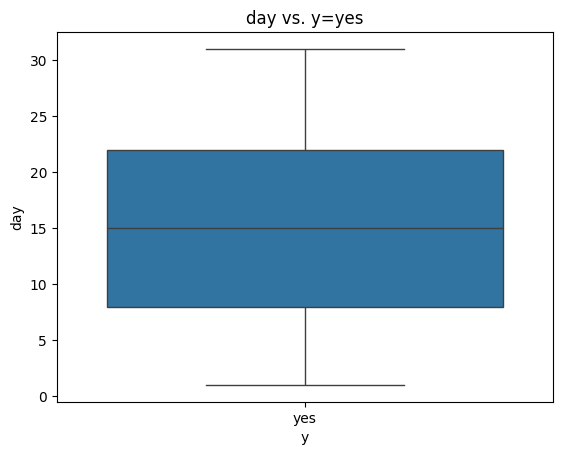

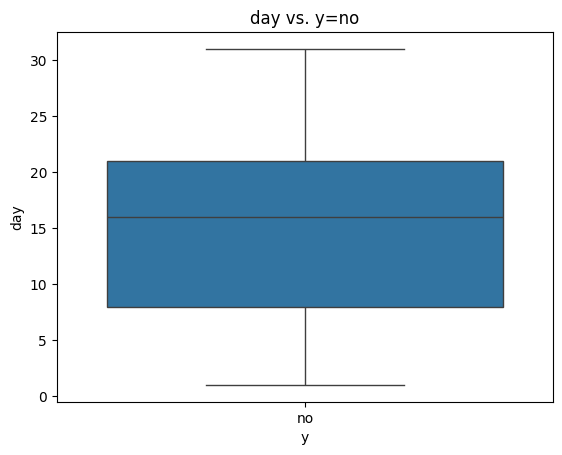

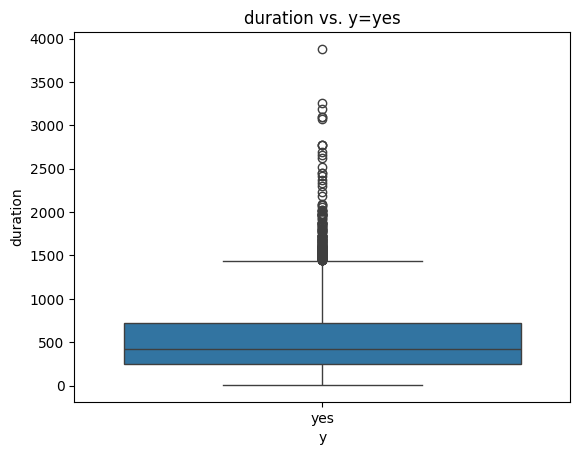

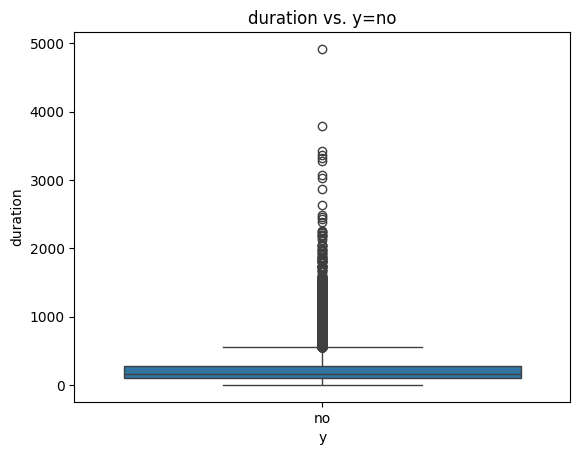

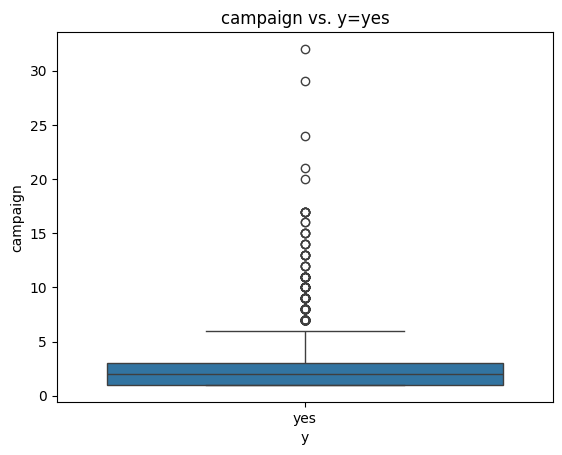

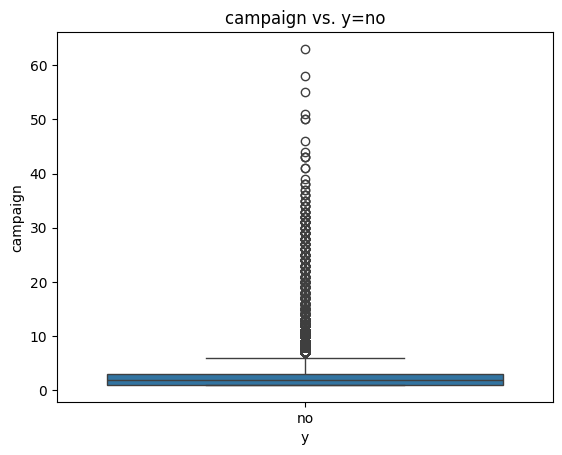

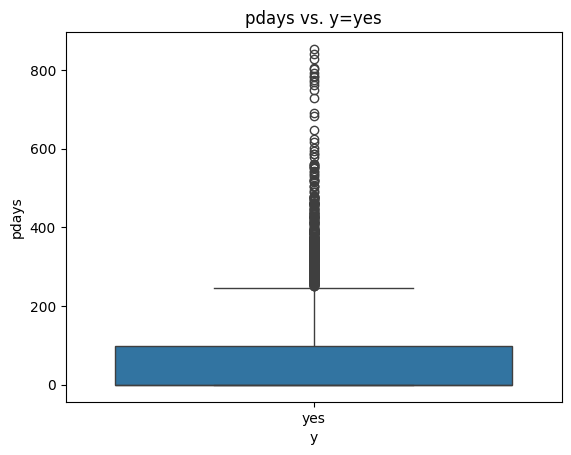

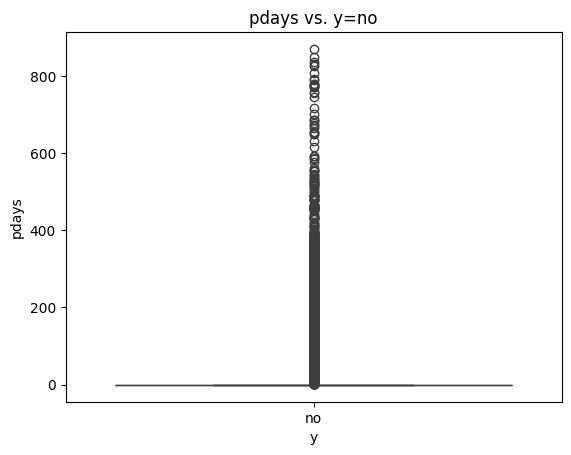

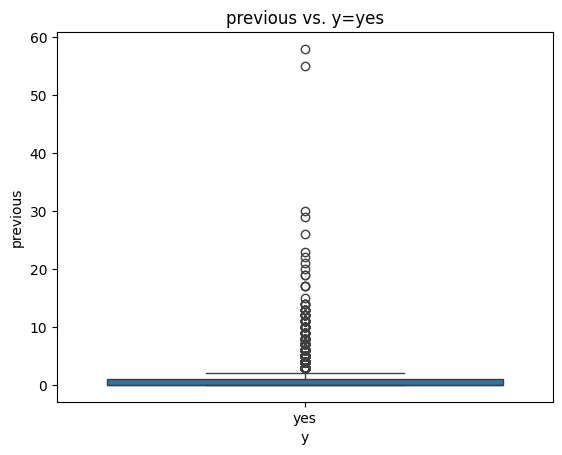

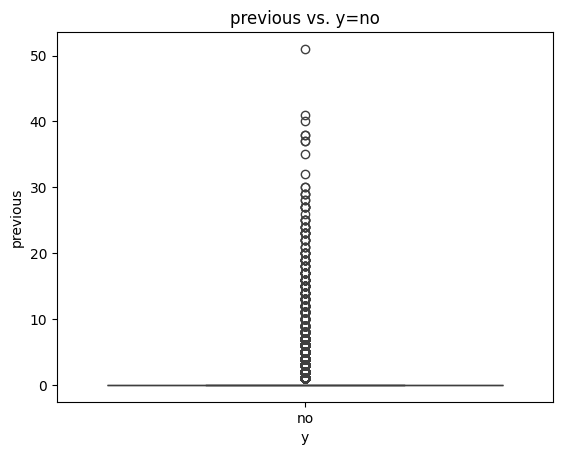


Matriz de correlación entre variables numéricas:
               day  duration  campaign     pdays  previous
day       1.000000 -0.030008  0.162270 -0.093025 -0.057196
duration -0.030008  1.000000 -0.084375 -0.002094 -0.000072
campaign  0.162270 -0.084375  1.000000 -0.088624 -0.038839
pdays    -0.093025 -0.002094 -0.088624  1.000000  0.541964
previous -0.057196 -0.000072 -0.038839  0.541964  1.000000


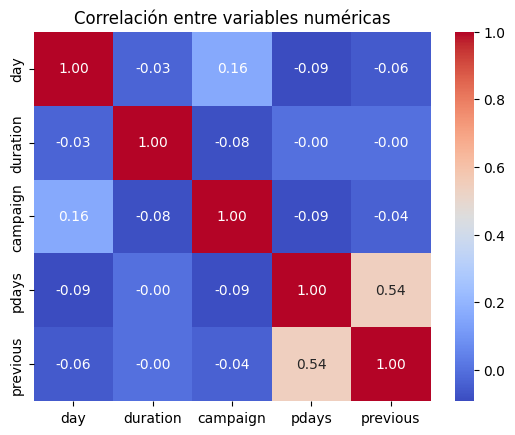

In [13]:
import scipy.stats as stats
import seaborn as sns

# Análisis bivariado de variables categóricas vs. categóricas
categorical_vars = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome", "grupo_edad", "segmento_saldo"]

for var in categorical_vars:
    contingency_table = pd.crosstab(data[var], data['y'])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    print(f'\nTabla de contingencia para {var} vs. y:')
    print(contingency_table)
    print(f'\nP-valor de la prueba de chi-cuadrado para {var} vs. y: {p}')

# Análisis bivariado de variables numéricas vs. categóricas
numeric_vars = ["day", "duration", "campaign", "pdays", "previous"]

for var in numeric_vars:
    for y_var in ['yes', 'no']:
        subset = data[data['y'] == y_var]
        sns.boxplot(x='y', y=var, data=subset)
        plt.title(f'{var} vs. y={y_var}')
        plt.show()

# Análisis bivariado de variables numéricas vs. numéricas
numeric_numeric_corr = data[numeric_vars].corr()
print('\nMatriz de correlación entre variables numéricas:')
print(numeric_numeric_corr)
sns.heatmap(numeric_numeric_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación entre variables numéricas')
plt.show()


Podemos destacar:

**P-valor de la prueba de chi-cuadrado:** Este valor indica la significancia estadística de la relación entre las dos variables. Un valor de p bajo (generalmente menos de 0.05) sugiere que hay una asociación significativa entre las dos variables, es decir, que no son independientes. En cambio, un valor de p alto sugiere que las dos variables son independientes. Por ejemplo, en la tabla de contingencia para "job vs. y", el valor de p es extremadamente bajo (4.9481029070625774e-172), lo que sugiere una asociación significativa entre el tipo de trabajo y el interés en adquirir el producto.

Con respecto a la correlación, vemos las siguientes conclusiones:

**day vs. duration:**

La correlación es muy baja (-0.030008), lo que indica una relación prácticamente inexistente entre el día y la duración de la llamada.

**day vs. campaign:**

La correlación es moderada (0.162270), lo que indica una relación débil pero positiva entre el día y el número de contactos durante la campaña.

**day vs. pdays:**

La correlación es baja (-0.093025), lo que indica una relación débil pero negativa entre el día y el número de días transcurridos desde el último contacto.

**day vs. previous:**

La correlación es baja (-0.057196), lo que indica una relación débil pero negativa entre el día y el número de contactos previos.

**duration vs. campaign:**

 La correlación es muy baja (-0.084375), lo que indica una relación prácticamente inexistente entre la duración de la llamada y el número de contactos durante la campaña.

**duration vs. pdays:**

La correlación es muy baja (-0.002094), lo que indica una relación prácticamente inexistente entre la duración de la llamada y el número de días transcurridos desde el último contacto.

**duration vs. previous:**

 La correlación es muy baja (-0.000072), lo que indica una relación prácticamente inexistente entre la duración de la llamada y el número de contactos previos.

**campaign vs. pdays:**

La correlación es baja (-0.088624), lo que indica una relación débil pero negativa entre el número de contactos durante la campaña y el número de días transcurridos desde el último contacto.

**campaign vs. previous:**

 La correlación es baja (-0.038839), lo que indica una relación débil pero negativa entre el número de contactos durante la campaña y el número de contactos previos.

**pdays vs. previous:**

La correlación es moderada (0.541964), lo que indica una relación moderadamente fuerte y positiva entre el número de días transcurridos desde el último contacto y el número de contactos previos.

# Conclusiones